In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-spotify-songs-in-countries/spotify_history.csv
/kaggle/input/top-spotify-songs-in-countries/spotify_data_dictionary Description.csv


In [2]:
df = pd.read_csv("/kaggle/input/top-spotify-songs-in-countries/spotify_history.csv")
df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [3]:
df['ts'] = pd.to_datetime(df['ts'])
df['hour'] = df['ts'].dt.hour
df['minute'] = df['ts'].dt.minute
df['seconds_played'] = df['ms_played'] / 1000
df['minutes_played'] = df['seconds_played'] / 60

In [4]:
print("=== SPOTIFY LISTENING DATA ANALYSIS ===\n")
# Basic Statistics
print("-" * 50)
print(f"Total tracks: {len(df)}")
print(f"Unique artists: {df['artist_name'].nunique()}")
print(f"Unique albums: {df['album_name'].nunique()}")
print(f"Total listening time: {df['minutes_played'].sum():.1f} minutes")
print(f"Average play time per track: {df['minutes_played'].mean():.1f} minutes")
print(f"Skip rate: {(df['skipped'].sum() / len(df) * 100):.1f}%")
print()

=== SPOTIFY LISTENING DATA ANALYSIS ===

--------------------------------------------------
Total tracks: 149860
Unique artists: 4113
Unique albums: 7948
Total listening time: 320492.2 minutes
Average play time per track: 2.1 minutes
Skip rate: 5.3%



In [5]:
# Artist Analysis
print("2. ARTIST ANALYSIS")
print("-" * 50)
artist_stats = df.groupby('artist_name').agg({
    'track_name': 'count',
    'minutes_played': 'sum',
    'ms_played': 'mean'
}).round(2)
artist_stats.columns = ['track_count', 'total_minutes', 'avg_ms_played']
artist_stats = artist_stats.sort_values('track_count', ascending=False)
print(artist_stats)
print()

2. ARTIST ANALYSIS
--------------------------------------------------
                track_count  total_minutes  avg_ms_played
artist_name                                              
The Beatles           13621       20169.74       88846.97
The Killers            6878       17659.28      154050.09
John Mayer             4855       12086.99      149375.79
Bob Dylan              3814        9490.94      149306.87
Paul McCartney         2697        5955.91      132500.69
...                     ...            ...            ...
OMA                       1           2.92      175500.00
Gary Allan                1           0.74       44691.00
OBESES                    1           4.62      277012.00
Nutopia                   1           3.41      204342.00
Doris Day                 1           2.60      156093.00

[4113 rows x 3 columns]



In [6]:
# Listening Patterns
print("3. LISTENING PATTERNS")
print("-" * 50)
hourly_pattern = df.groupby('hour').agg({
    'track_name': 'count',
    'minutes_played': 'sum'
}).round(2)
hourly_pattern.columns = ['track_count', 'total_minutes']
print("By Hour:")
print(hourly_pattern)
print()

3. LISTENING PATTERNS
--------------------------------------------------
By Hour:
      track_count  total_minutes
hour                            
0           10884       21870.05
1            9395       19213.02
2            9029       17374.23
3            8550       16585.26
4            6355       14050.94
5            7164       13729.92
6            7369       13448.10
7            4412        8504.60
8            2312        5035.43
9            1695        3480.94
10           1207        2493.93
11            903        1774.60
12            724        1755.00
13           1658        3804.54
14           2759        6814.48
15           3725        9396.06
16           6737       16403.86
17           9194       23031.05
18           8945       23060.83
19           8165       21140.90
20          10494       21667.94
21           8953       18385.34
22           8715       16833.81
23          10516       20637.34



In [7]:
# Reason Analysis
print("4. USER BEHAVIOR ANALYSIS")
print("-" * 50)
print("Start reasons:")
print(df['reason_start'].value_counts())
print("\nEnd reasons:")
print(df['reason_end'].value_counts())
print()

4. USER BEHAVIOR ANALYSIS
--------------------------------------------------
Start reasons:
reason_start
trackdone     76655
fwdbtn        53793
clickrow      11228
appload        3729
backbtn        2205
playbtn        1458
remote          477
trackerror      120
unknown          23
nextbtn          21
popup             5
endplay           2
autoplay          1
Name: count, dtype: int64

End reasons:
reason_end
trackdone                       77194
fwdbtn                          53470
endplay                         10119
logout                           4367
backbtn                          2182
unexpected-exit-while-paused     1725
unknown                           268
remote                            224
unexpected-exit                   118
clickrow                           34
nextbtn                            21
appload                             7
popup                               6
reload                              4
trackerror                          4
Name: count, d

In [8]:
# Clean up artist names to remove special characters like '$'
df['artist_name'] = df['artist_name'].str.replace('$', '', regex=False)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33853 (\N{CJK UNIFIED IDEOGRAPH-843D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39131 (\N{CJK UNIFIED IDEOGRAPH-98DB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12476 (\N{KATAKANA LETTER ZE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

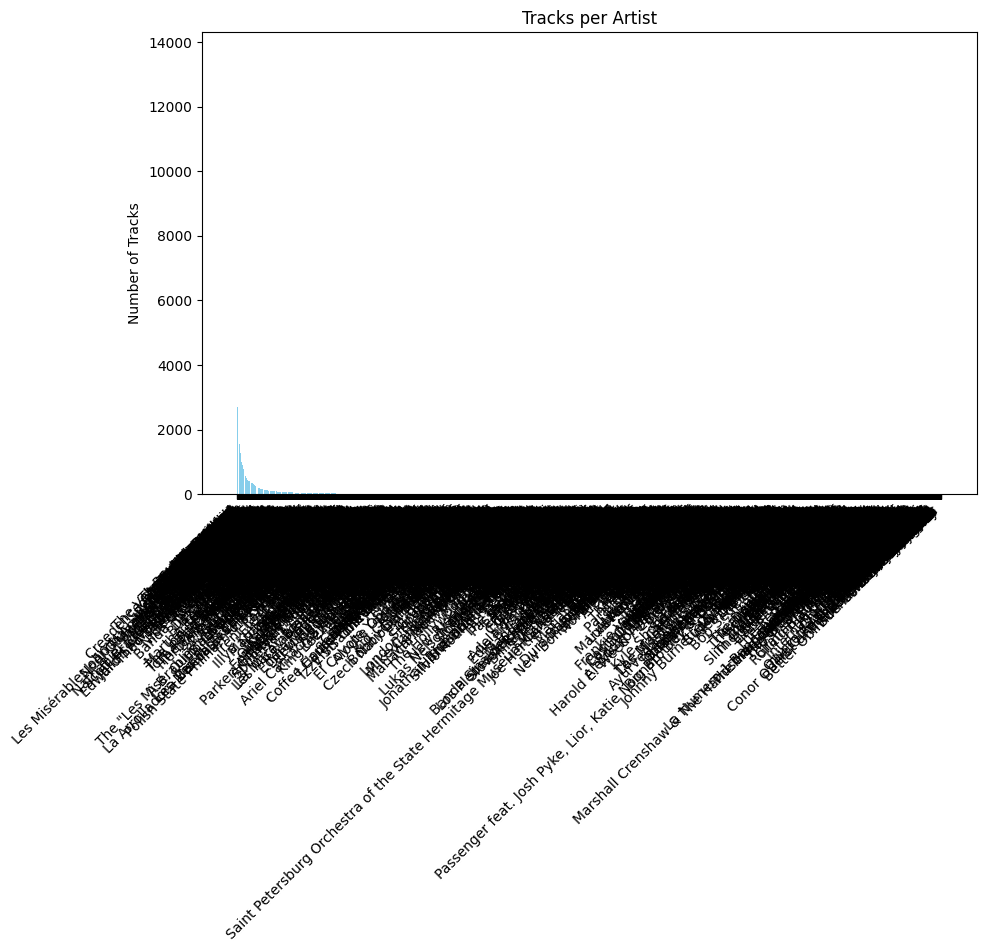

In [9]:
# 1. Artist popularity
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
artist_counts = df['artist_name'].value_counts()
plt.bar(range(len(artist_counts)), artist_counts.values, color='skyblue')
plt.xticks(range(len(artist_counts)), artist_counts.index, rotation=45, ha='right')
plt.title('Tracks per Artist')
plt.ylabel('Number of Tracks')
plt.show()

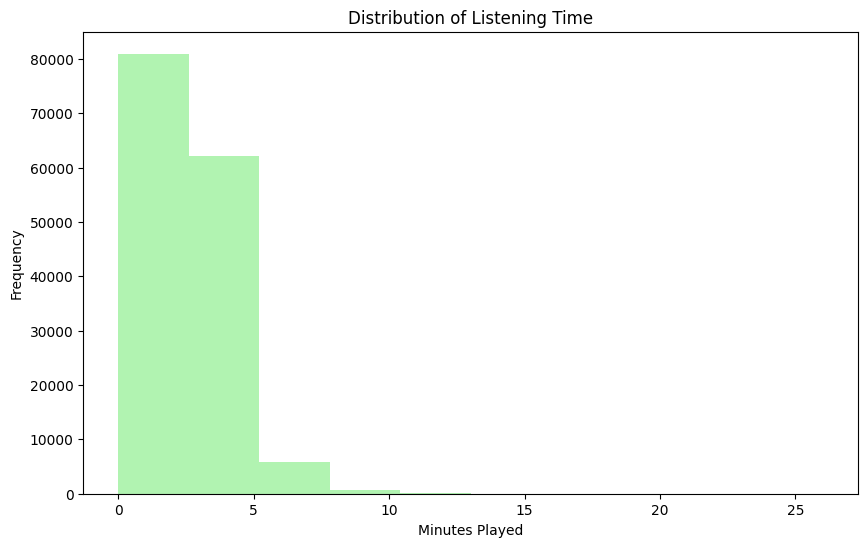

In [10]:
# 2. Listening time distribution
plt.figure(figsize=(10, 6))
plt.hist(df['minutes_played'], bins=10, color='lightgreen', alpha=0.7)
plt.title('Distribution of Listening Time')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

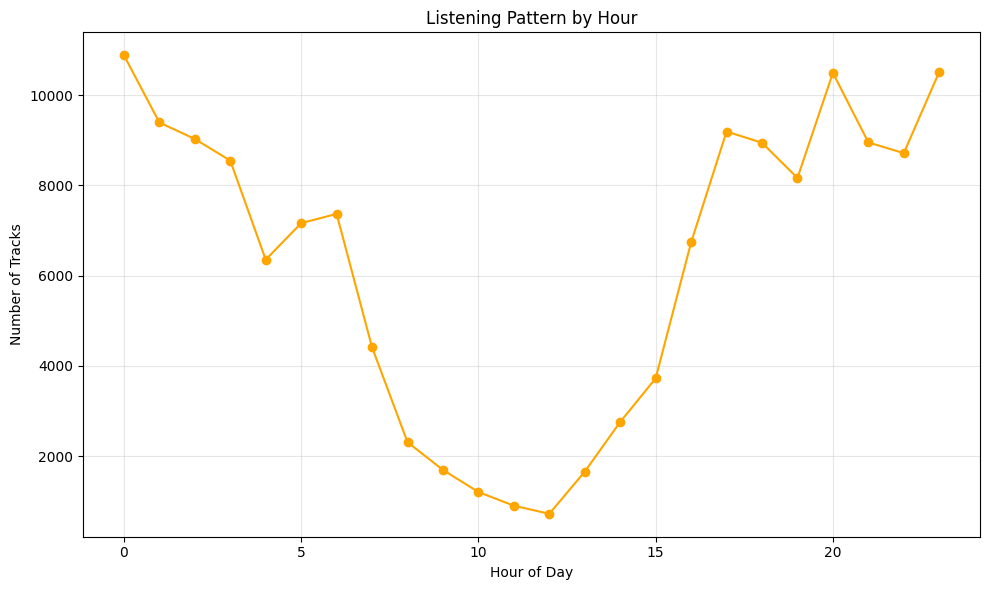

In [11]:
# 3. Hourly listening pattern
plt.figure(figsize=(10, 6))
hourly_data = df.groupby('hour')['track_name'].count()
plt.plot(hourly_data.index, hourly_data.values, marker='o', color='orange')
plt.title('Listening Pattern by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tracks')
plt.grid(True, alpha=0.3)
plt.tight_layout()

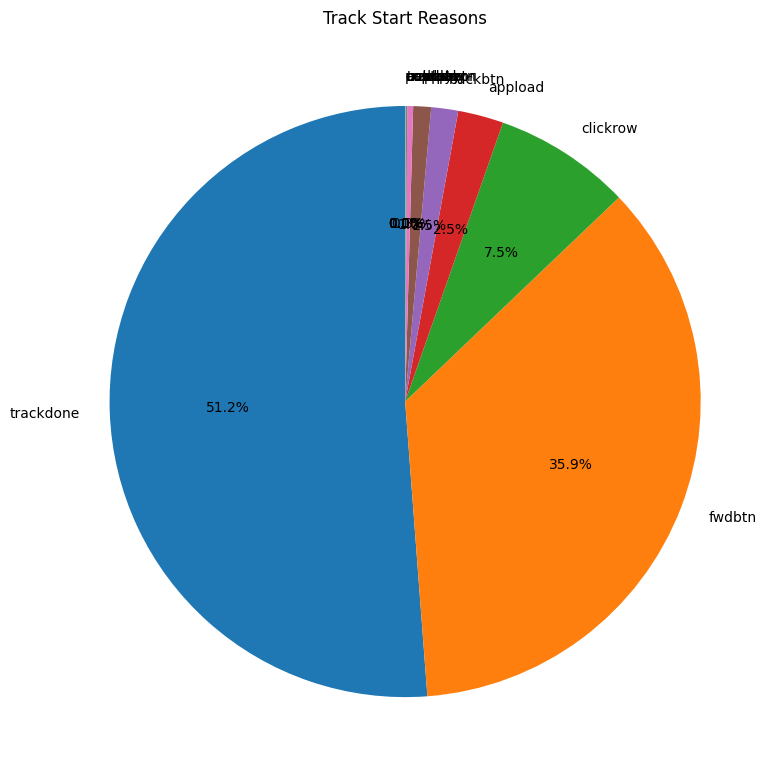

In [12]:
# 4. Reason analysis
plt.figure(figsize=(8, 8))
reason_counts = df['reason_start'].value_counts()
plt.pie(reason_counts.values, labels=reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Track Start Reasons')
plt.tight_layout()